# RHEED diffraction profiles
This notebook shows how to use xrheed to get a diffraction profile from an RHEED image.

As shown in `getting_sarted` notebook, first we need to load xrheed library and then the RHEED image.

In [1]:
import xrheed
from xrheed.io import load_data

import matplotlib.pyplot as plt
import numpy as np
import xarray as xr
from pathlib import Path

In [2]:
image_dir = Path("example_data")
image_path = image_dir / "Si_111_7x7_112_phi_00.raw"

rheed_image = load_data(image_path, plugin="dsnp_arpes_raw")
print(rheed_image.R)

<RHEEDAccessor>
  Image shape: (1038, 1388)
  Screen scale: 9.6
  Screen sample distance: 309.20
  Theta angle: 1.00 deg
  Beam Energy: 18600.0 eV



## RHEED data preparation
The RHEED image should be aligned by applying rotation if necessary and moved horizontally and vertically to get the image center in proper place.

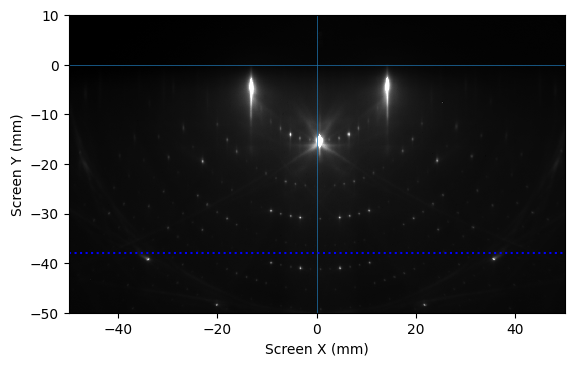

In [3]:
# Create a copy of an image
rotated_image = rheed_image.copy()

# Rotate the image
rotated_image.R.rotate(-0.5)

fig, ax = plt.subplots()
rotated_image.R.plot_image(ax=ax)

# add horizontal line to check the rotation alignment
ax.axhline(-38.0, color='b', linestyle=':')

plt.show()

In [4]:
# Use now the rotated image for further analysis
rheed_image = rotated_image

# Apply automatic center search again after rotation
rheed_image.R.apply_image_center(auto_center=True)

For convenience setup the region of interest (ROI) and plot the image.

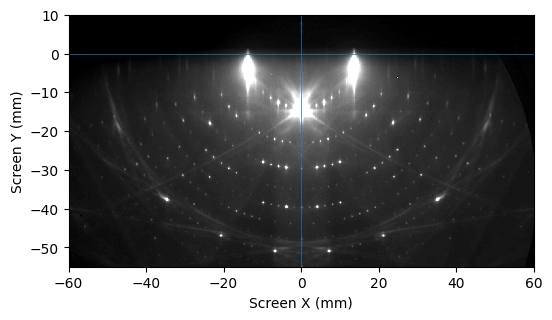

In [5]:
rheed_image.R.screen_roi_width = 60
rheed_image.R.screen_roi_height = 55

# Use automatic levels adjustment
rheed_image.R.plot_image(auto_levels=1.0)
plt.show()

## Profile extraction
Since the RHEED image is stored as an DataArray the profile could be simply taken using build-in `sel` method as shown bellow. However, it is recommended to use a build in accessory to get a profile as shown later.

In [ ]:
x_range = (-20, 20)
y_range = (-20, 0)

profile = rheed_image.sel(x=slice(*x_range), y=slice(*y_range)).sum("y")

## Profile extraction using the `get_profile` method
A `get_profile` method in R accesory could be also used to extract a profile by giving the center point, the width and the height.

In [8]:
profile = rheed_image.R.get_profile(center=(0, -10), width=40, height=20)
profile.rp

<RHEEDProfileAccessor
  Center: (0, -10)
  Width: 40
  Height: 20

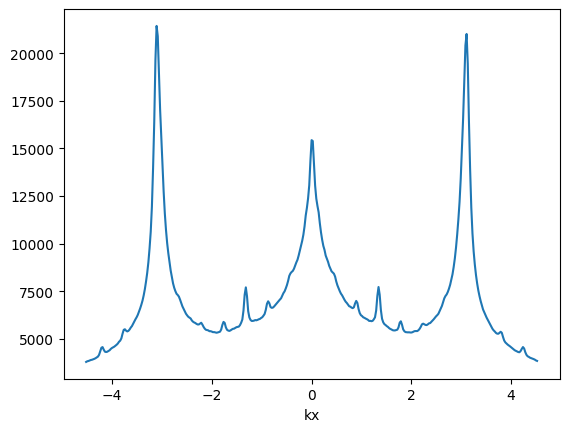

In [9]:
profile_kx = profile.rp.convert_to_kx()
profile_kx.plot()
plt.show()